### Joining on IMBD basics with TN budgets



In [161]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

In [146]:
ls

Dani/                         movies_gross_clean.csv
DataClean_Nick.ipynb          peoplefigs/
Data_cleaning_marvel.ipynb    profitability_join.ipynb
Nick_movieppl_analysis.ipynb  theNumbers_clean.csv
README.md                     twitter_reviews_clean.csv
cleanIMDB/                    zippedData/
imdb_combined_prof.csv


In [1]:
ls ./zippedData/

bom.movie_gross.csv.gz        imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz       rt.movie_info.tsv.gz
imdb.title.akas.csv.gz        rt.reviews.tsv.gz
imdb.title.basics.csv.gz      tmdb.movies.csv.gz
imdb.title.crew.csv.gz        tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


In [148]:
tn_df = pd.read_csv('theNumbers_clean.csv')
imdb_basics = pd.read_csv('./cleanIMDB/imdb_comp.csv')
twitter_reviews = pd.read_csv('twitter_reviews_clean.csv')
movies_gross = pd.read_csv('movies_gross_clean.csv')

In [149]:
# Check number of duplicates in each dataset

print(imdb_basics.duplicated(subset='primary_title').sum())
print(tn_df['movie'].duplicated().sum())

10073
35


In [150]:
imdb_basics.head(1)

,Unnamed: 0,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,...,archive_footage,archive_sound,cinematographer,composer,director_pr,editor,producer,production_designer,self,writer_pr
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"['Action', 'Crime', 'Drama']",7.0,77.0,['nm0712540'],...,NaN,NaN,NaN,['nm0006210'],['nm0712540'],NaN,NaN,NaN,NaN,"['nm0023551', 'nm1194313', 'nm0347899', 'nm139..."


In [151]:
tn_df.head(1)

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI %,ROI $,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,5.532577,2351345279,2009,December,1.27,3.525959e+09,9.658447e+08,539750000.0,2.986209e+09


In [152]:
# Concatenate movie name and year together, creating a new column called 'concat'

tn_df['concat'] = tn_df['movie'] + tn_df['year'].apply(lambda x: str(x))
imdb_basics['concat'] = imdb_basics['primary_title'] + imdb_basics['start_year'].apply(lambda x: str(x))

In [153]:
# Join based on our new concatenated field

imdb_combined = imdb_basics.merge(tn_df, how='inner', on='concat')

In [154]:
# Check how clean the star wars data is

# tn_star_wars = tn_df[tn_df['movie'].apply(lambda x: x.startswith('Star Wars'))]
# imdb_star_wars = imdb_basics[imdb_basics['primary_title'].apply(lambda x: x.startswith('Star Wars'))]

In [155]:
# create a new column for ROI %, using gross & budget adjusted for inflation
imdb_combined['ROI%_inf'] = (imdb_combined['worldwide_gross_inf']-imdb_combined['production_budget_inf'])\
                             / imdb_combined['production_budget_inf'] * 100

In [156]:
imdb_combined.sort_values('ROI%_inf', ascending=False)

,Unnamed: 0_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,...,ROI %,ROI $,year,month,inflation,worldwide_gross_inf,domestic_gross_inf,production_budget_inf,ROI $ Inf,ROI%_inf
910,35625,tt2309260,The Gallows,The Gallows,2015,81.0,"['Horror', 'Mystery', 'Thriller']",4.2,17763.0,"['nm4000389', 'nm3951039']",...,415.564740,41556474,2015,July,1.15,4.790495e+07,2.617907e+07,115000.0,4.778995e+07,41556.474000
482,9487,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,['Horror'],4.2,33522.0,['nm0068587'],...,100.759490,100759490,2012,January,1.19,1.210938e+08,6.338290e+07,1190000.0,1.199038e+08,10075.949000
466,8964,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,['Horror'],5.7,93122.0,['nm0931095'],...,58.170677,174512032,2010,October,1.25,2.218900e+08,1.059411e+08,3750000.0,2.181400e+08,5817.067733
1318,87039,tt5052448,Get Out,Get Out,2017,104.0,"['Horror', 'Mystery', 'Thriller']",7.7,400474.0,['nm1443502'],...,50.073590,250367951,2017,February,1.11,2.834584e+08,1.954051e+08,5550000.0,2.779084e+08,5007.359020
1312,85930,tt4975722,Moonlight,Moonlight,2016,111.0,['Drama'],7.4,227964.0,['nm1503575'],...,42.497008,63745512,2016,October,1.14,7.437988e+07,3.175462e+07,1710000.0,7.266988e+07,4249.700800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,60973,tt3523348,Destiny,Destiny,2014,105.0,"['Drama', 'Music', 'Romance']",7.8,36.0,['nm4154451'],...,-0.999400,-749550,2014,December,1.15,5.175000e+02,0.000000e+00,862500.0,-8.619825e+05,-99.940000
1097,55110,tt3231362,Destiny,Destiny,2014,NaN,"['Adventure', 'Comedy', 'Family']",8.4,25.0,['nm5932375'],...,-0.999400,-749550,2014,December,1.15,5.175000e+02,0.000000e+00,862500.0,-8.619825e+05,-99.940000
979,41677,tt2503954,Broken Horses,Broken Horses,2015,101.0,"['Action', 'Crime', 'Drama']",5.7,1957.0,['nm0006765'],...,-0.999769,-14996529,2015,September,1.15,3.991650e+03,0.000000e+00,17250000.0,-1.724601e+07,-99.976860
837,29832,tt2141739,Food Chains,Food Chains,2014,83.0,['Documentary'],7.2,328.0,['nm2515753'],...,-0.999807,-912824,2014,November,1.15,2.024000e+02,0.000000e+00,1049950.0,-1.049748e+06,-99.980723


In [157]:
imdb_sort = imdb_combined.sort_values('ROI%_inf',ascending=True)
imdb_sort = imdb_sort[:-2] # remove The Gallows (2015) and The Devil Inside (2012) because they are outliers
# only films that have grossed at least $100K worldwide: less than that could just be limited runs
imdb_sort = imdb_sort[imdb_sort['worldwide_gross_inf'] >= 100000] 

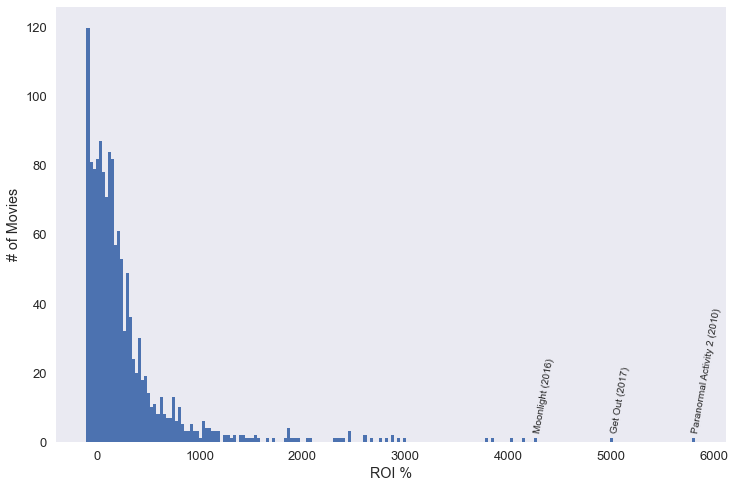

In [175]:
fig, ax = plt.subplots(figsize=[12,8])
plt.style.use('seaborn-talk')

ax.hist(imdb_sort['ROI%_inf'], bins=200)
ax.set_xlabel('ROI %')
ax.set_ylabel('# of Movies')
ax.annotate('Paranormal Activity 2 (2010)',(5930,3),rotation=80,ha='center')
ax.annotate('Get Out (2017)',(5090,3),rotation=80,ha='center')
ax.annotate('Moonlight (2016)',(4350,3),rotation=80,ha='center')
ax.grid(False)
plt.savefig('raw_data_hist.png');

In [167]:
imdb_sort.to_csv('imdb_combined_prof.csv')